# Treinamento e Teste de Machine Learning para Análise de Crédito de Clientes
#### O objetivo principal desse projeto é desenvolver um algoritmo de aprendizado de máquina capaz de avaliar o perfil dos clientes e determinar se eles são classificados como adimplentes ou inadimplentes. Essa análise é fundamental para que o banco possa tomar decisões mais informadas sobre a concessão de crédito e a oferta de produtos financeiros.

#### Através desse processo, o banco pretende identificar os clientes adimplentes, ou seja, aqueles que têm um histórico confiável de pagamento, para oferecer a eles oportunidades de crédito ampliadas e produtos financeiros vantajosos. Isso contribuirá para fortalecer o relacionamento com esses clientes e aumentar a lucratividade.

#### Por outro lado, o banco também pretende calcular o risco de inadimplência e, quando necessário, vetar a concessão de crédito e produtos para os clientes classificados como inadimplentes. Isso ajudará a proteger os interesses da instituição financeira e a manter a saúde financeira da mesma.

#### Nesse contexto, o uso de algoritmos de machine learning desempenha um papel fundamental, permitindo uma análise mais precisa e automatizada dos dados dos clientes, levando em consideração uma variedade de fatores e indicadores. Portanto, este projeto visa aprimorar a capacidade do banco de tomar decisões mais estratégicas e fundamentadas no que diz respeito à gestão de crédito e relacionamento com seus clientes.

#### Os dados são forncidos em Kaggle.com

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import missingno as ms

## Carregando dados

In [3]:
data = pd.read_csv('credito.csv')
data.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [4]:
data.tail()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


In [5]:
#exclusão de coluna id
data.drop('id', axis=1, inplace=True)

In [6]:
data.head()

,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [7]:
data.shape

(10127, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   default                  10127 non-null  int64 
 1   idade                    10127 non-null  int64 
 2   sexo                     10127 non-null  object
 3   dependentes              10127 non-null  int64 
 4   escolaridade             10127 non-null  object
 5   estado_civil             10127 non-null  object
 6   salario_anual            10127 non-null  object
 7   tipo_cartao              10127 non-null  object
 8   meses_de_relacionamento  10127 non-null  int64 
 9   qtd_produtos             10127 non-null  int64 
 10  iteracoes_12m            10127 non-null  int64 
 11  meses_inativo_12m        10127 non-null  int64 
 12  limite_credito           10127 non-null  object
 13  valor_transacoes_12m     10127 non-null  object
 14  qtd_transacoes_12m       10127 non-nul

## Limpeza

In [9]:
duplicadas = data.duplicated().sum()
duplicadas

0

In [10]:
data.isnull().sum().sort_values(ascending =False)[:10]

default                    0
idade                      0
sexo                       0
dependentes                0
escolaridade               0
estado_civil               0
salario_anual              0
tipo_cartao                0
meses_de_relacionamento    0
qtd_produtos               0
dtype: int64

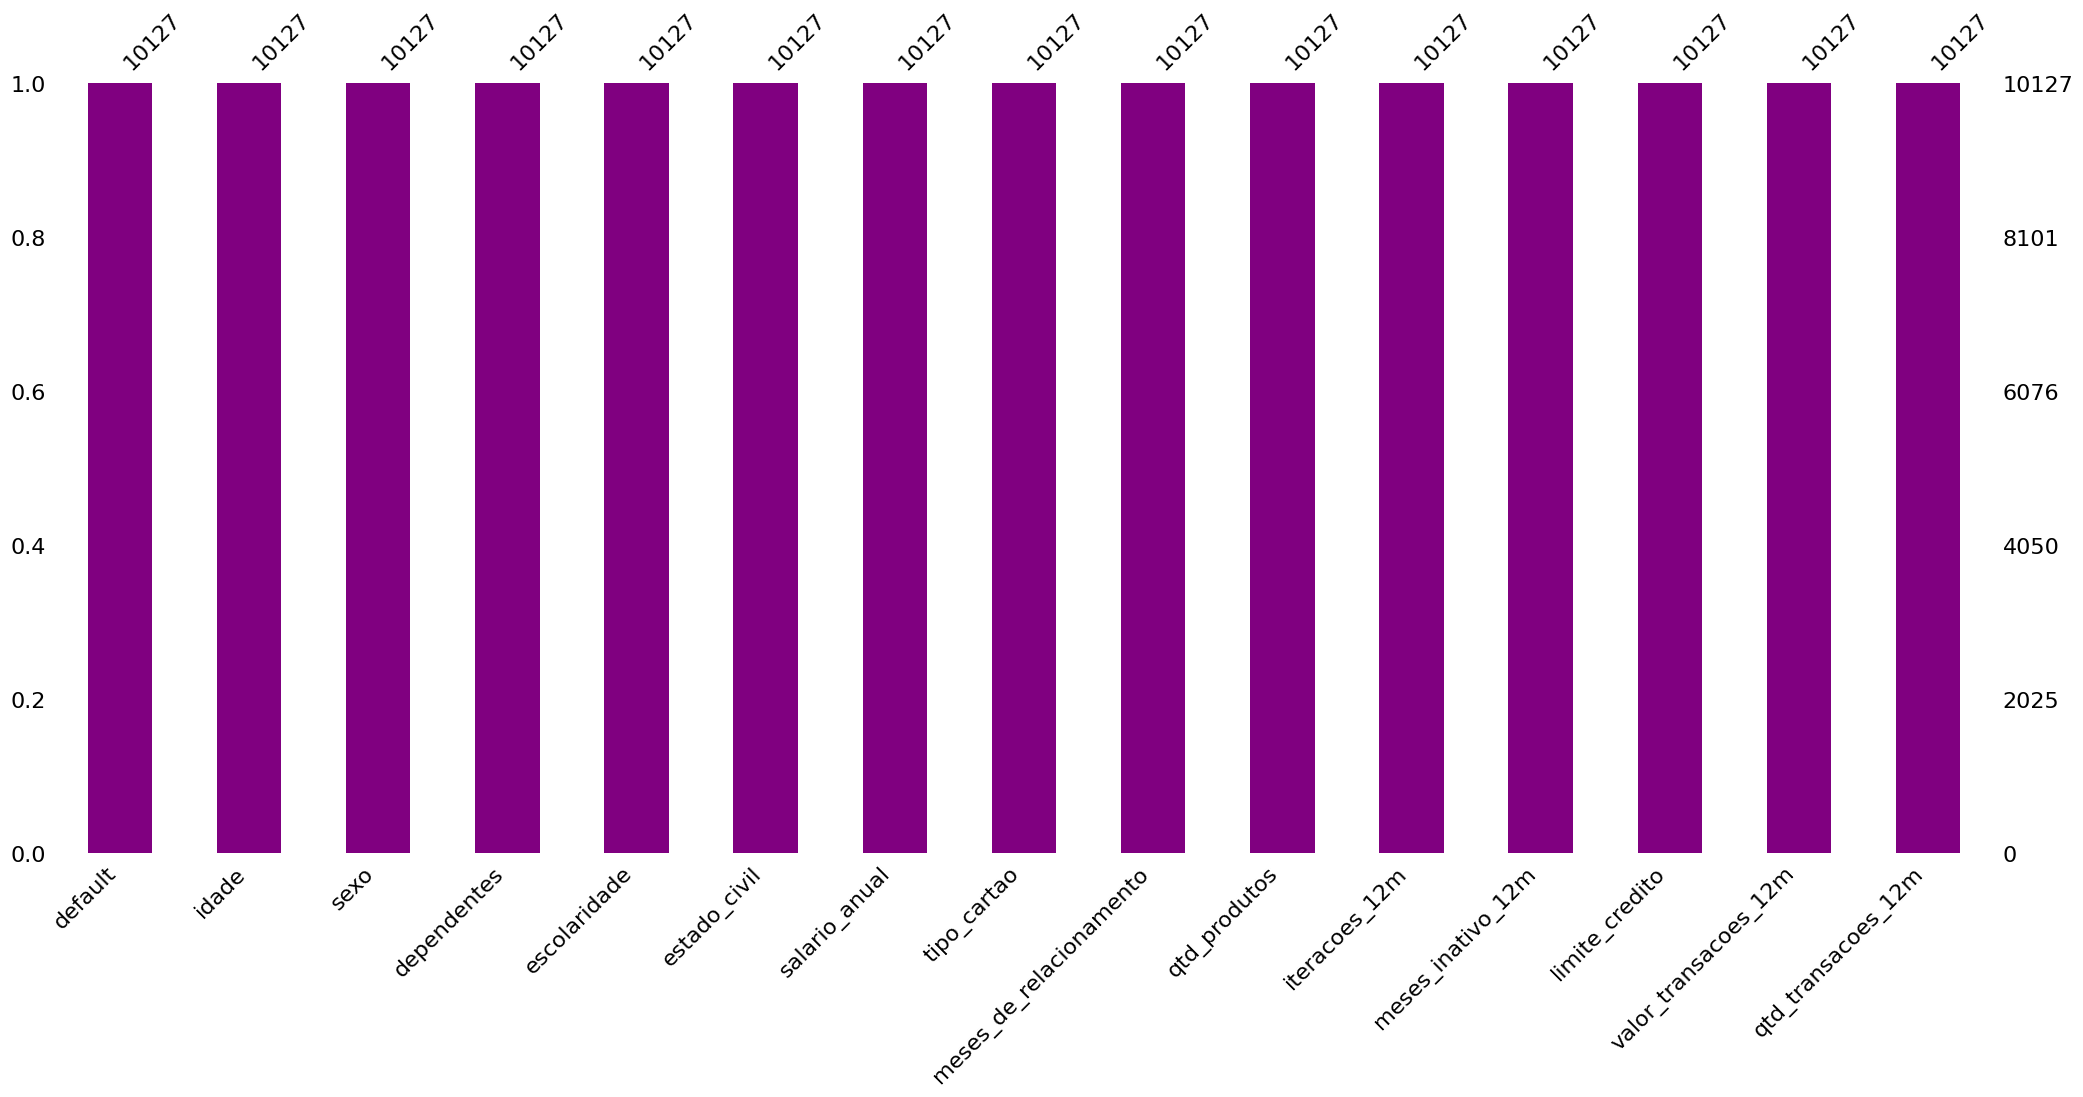

In [11]:
ms.bar(data, color = "Purple")
plt.show()

## Análise Estatistica

In [12]:
data.describe(include = 'all')

,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
count,10127.000000,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,10127.000000,10127.000000,10127.000000,10127,10127,10127.000000
unique,NaN,NaN,2,NaN,6,4,6,4,NaN,NaN,NaN,NaN,9272,10035,NaN
top,NaN,NaN,F,NaN,mestrado,casado,menos que $40K,blue,NaN,NaN,NaN,NaN,"1.438,21","3.851,51",NaN
freq,NaN,NaN,5358,NaN,3128,4687,3561,9436,NaN,NaN,NaN,NaN,11,3,NaN
mean,0.160660,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,3.812580,2.455317,2.341167,NaN,NaN,64.858695
std,0.367235,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,1.554408,1.106225,1.010622,NaN,NaN,23.472570
min,0.000000,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,1.000000,0.000000,0.000000,NaN,NaN,10.000000
25%,0.000000,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,3.000000,2.000000,2.000000,NaN,NaN,45.000000
50%,0.000000,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,4.000000,2.000000,2.000000,NaN,NaN,67.000000
75%,0.000000,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,5.000000,3.000000,3.000000,NaN,NaN,81.000000


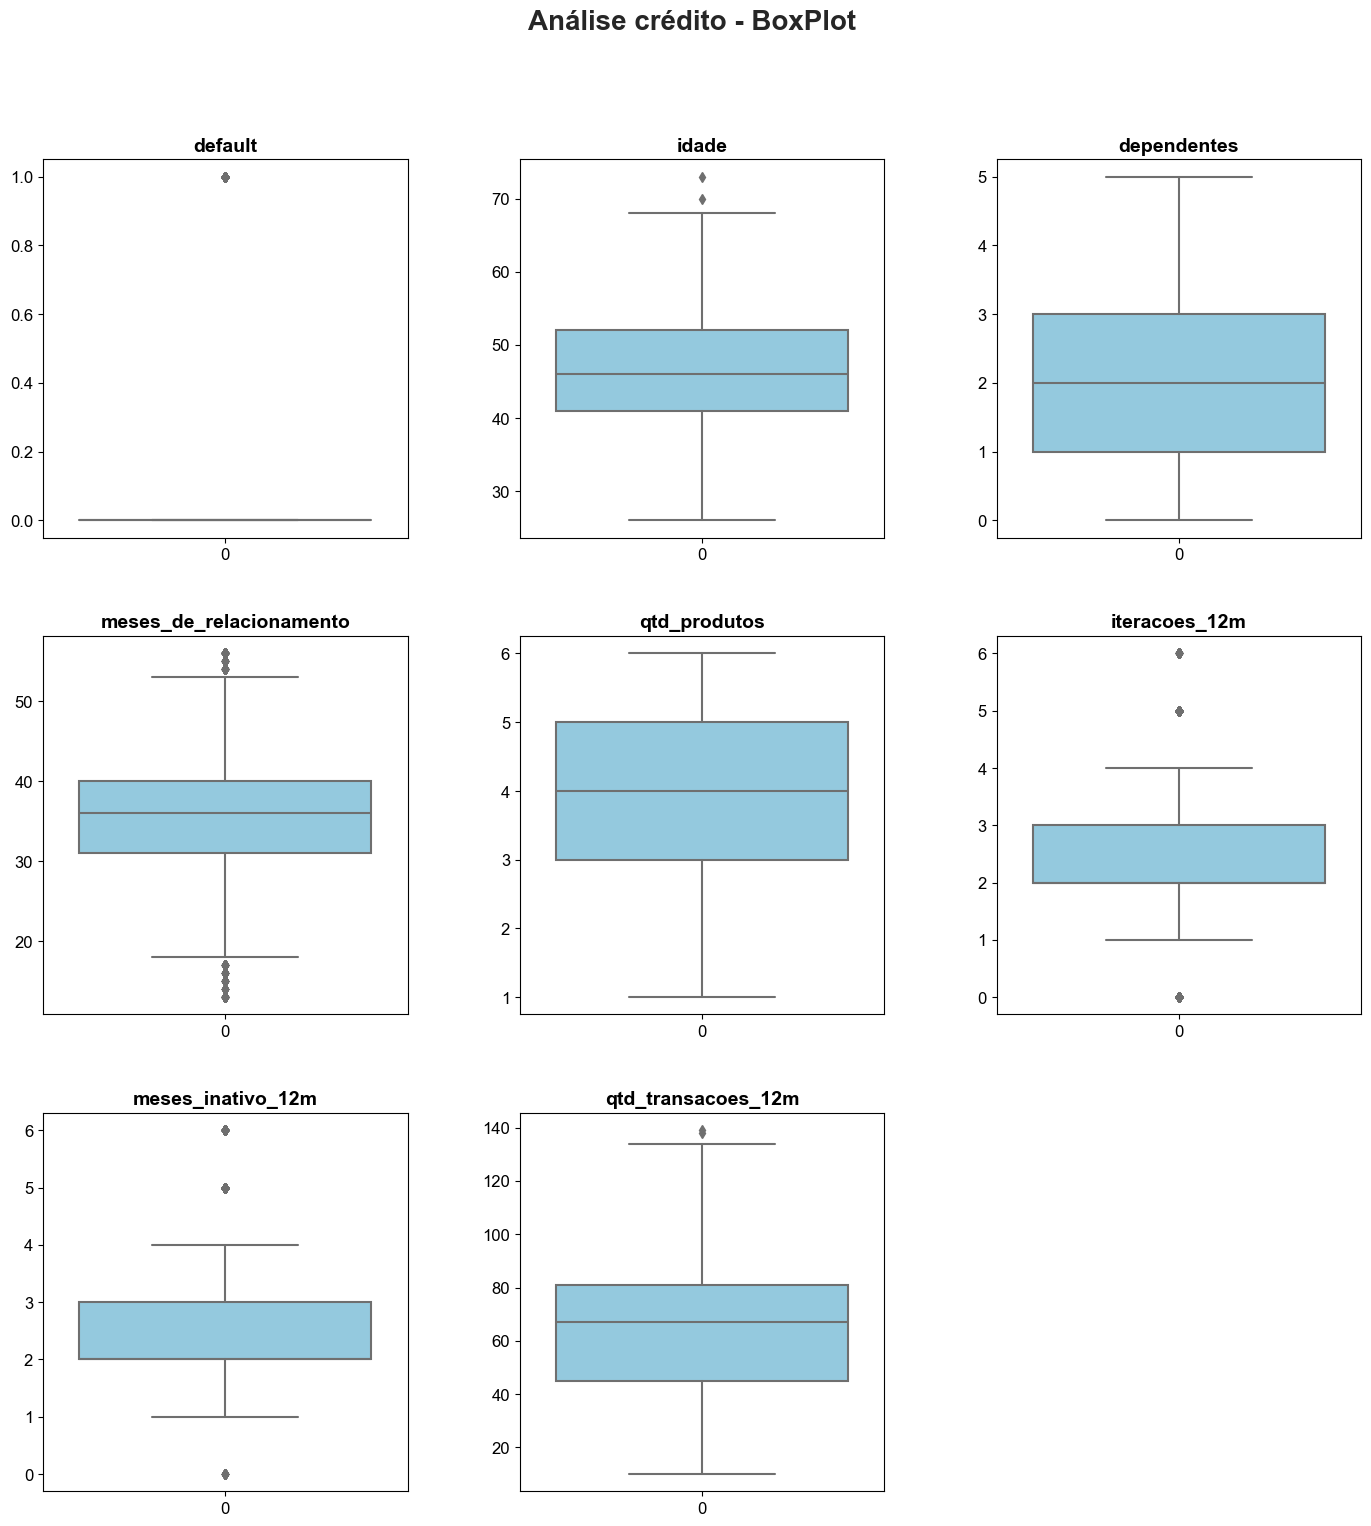

In [13]:
def data_box_plot(data):
    
    # Seleciona colunas numéricas
    col_numerica = data.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(col_numerica) // 3 + (len(col_numerica) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(15, nrows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=5)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(col_numerica):
        sns.boxplot(data=data[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])


    fig.suptitle("Análise crédito - BoxPlot", fontsize=20, fontweight='bold', y=1.05)

# Plot
data_box_plot(data)

<b> - As variáveis apresentam outliers exceto (dependente). pontos que estão fora dos "radares" do boxplot e podem indicar valores atipicamente altos ou baixos. por exemplo "meses_inativo_12m" pode indicar que a pessoa ficou mais de 12 meses inativa ou menos de 12 meses.

<b> - Algumas variáveis mostram mais amplitude dos dados no intervalo interquartil (IQR) com boxplot relativamente largos, mostrando mais variabilidade nos dados.

<b> - A maioria dos clientes ficam inativas entre 2 a 3 meses
    
<b> - A maioria dos clientes interagem durante 2 a 3 meses

<b> - Os clientes fazem entre 42 a 81 transações por ano, com +- uma media de 65 transações por ano.

<b> - Os clientes tendem a ter entre 3 a 5 produtos com uma média de 4 produtos por pessoa.

<b>  - A maioria dos clientes tendem a ter entre 32 a 40 meses de relacionamento.

<b>  - As maioria dos clientes tem entre 2 a 3 dependentes.

## Distribuição de idades gráfico de barras

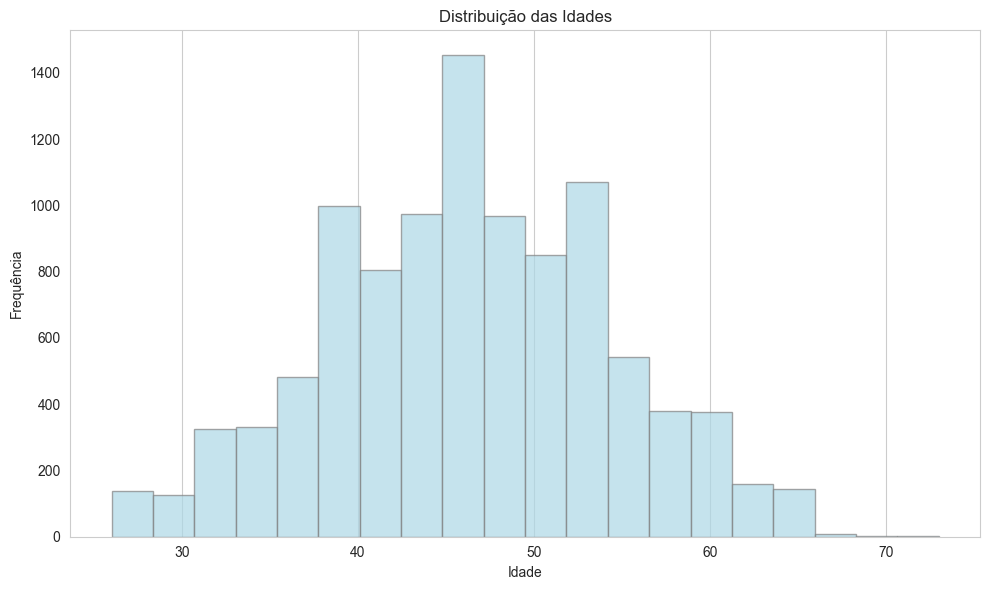

In [16]:
idade= data['idade']
plt.figure(figsize=(10, 6))
plt.hist(idade, bins=20, edgecolor='grey', alpha=0.7, color='lightblue')
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<b> No gráfico podemos ver que as idades estão distribuidas em sua maioria entre 35 a 45 anos.

### Verificando o sexo do predominante em nosso dataset

In [18]:
publico = data['sexo'].value_counts()
publico

F    5358
M    4769
Name: sexo, dtype: int64

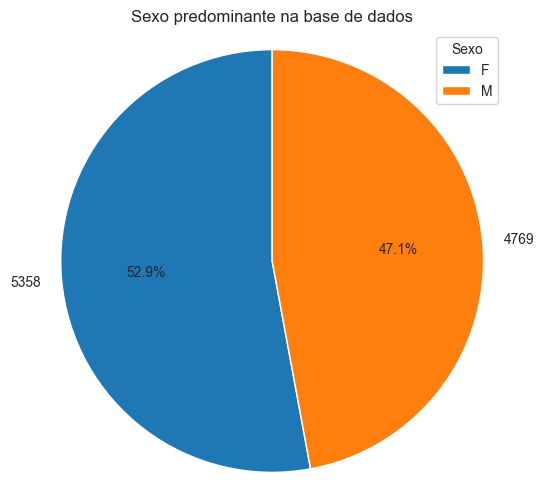

In [19]:
plt.figure(figsize=(6, 6))  # Define o tamanho da figura
plt.pie(publico, labels=publico, autopct='%1.1f%%', startangle=90)
plt.title('Sexo predominante na base de dados')
plt.legend(title='Sexo', labels=('F','M'), loc='upper right')
plt.axis('equal')  # Garante que o gráfico de pizza seja uma circunferência
plt.show()

<b> Podemos ver que o público predominante no dataset é Feminino com 52%.

In [62]:
est_civil = data['estado_civil'].value_counts()
est_civil

casado        4687
solteiro      3943
na             749
divorciado     748
Name: estado_civil, dtype: int64

### Analisando variável Estado cívil

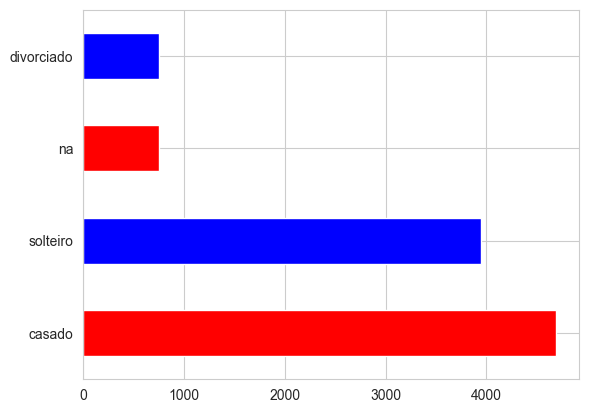

In [63]:
est_civil.plot(kind='barh', color = ['red', 'blue']);

<b> Podemos ver que a maioria das pessoas nos dados são casadas (4687 pessoas) ou solteiras (3943 pessoas)

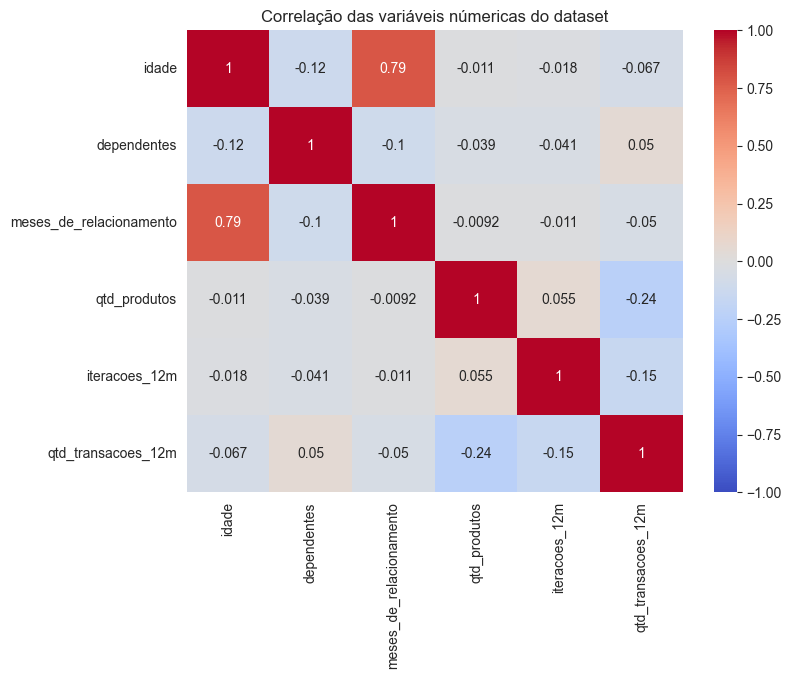

In [64]:
correlacao = data[['idade','dependentes', 'meses_de_relacionamento','qtd_produtos','iteracoes_12m','qtd_transacoes_12m']]
matriz = correlacao.corr()
plt.figure(figsize=(8,6))
sns.heatmap(matriz, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação das variáveis númericas do dataset')
plt.show()

<b> Correlação positiva com Idade e meses de relacionamento.

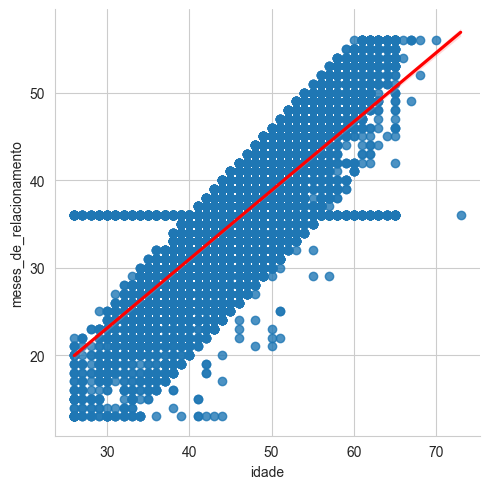

In [23]:
sns.lmplot(x='idade', y='meses_de_relacionamento', data=correlacao, line_kws={'color': 'red'});

#### Verificando frêquencia

In [25]:
data.stb.freq(['idade','meses_de_relacionamento'], thresh=40, other_label = 'Outros', style = True)

,idade,meses_de_relacionamento,count,percent,cumulative_count,cumulative_percent
0,47.000000,36.000000,151,1.49%,151,1.49%
1,45.000000,36.000000,140,1.38%,291,2.87%
2,44.000000,36.000000,140,1.38%,431,4.26%
3,48.000000,36.000000,127,1.25%,558,5.51%
4,42.000000,36.000000,125,1.23%,683,6.74%
5,49.000000,36.000000,123,1.21%,806,7.96%
6,46.000000,36.000000,122,1.20%,928,9.16%
7,43.000000,36.000000,118,1.17%,"1,046",10.33%
8,50.000000,36.000000,109,1.08%,"1,155",11.41%
9,41.000000,36.000000,96,0.95%,"1,251",12.35%


In [26]:
data.stb.freq(['idade','qtd_produtos','iteracoes_12m'], thresh=40, other_label = 'Outros', style = True)

,idade,qtd_produtos,iteracoes_12m,count,percent,cumulative_count,cumulative_percent
0,44.000000,3.000000,2.000000,47,0.46%,47,0.46%
1,48.000000,3.000000,2.000000,42,0.41%,89,0.88%
2,50.000000,4.000000,3.000000,38,0.38%,127,1.25%
3,47.000000,3.000000,2.000000,38,0.38%,165,1.63%
4,46.000000,3.000000,2.000000,38,0.38%,203,2.00%
5,45.000000,6.000000,3.000000,38,0.38%,241,2.38%
6,44.000000,2.000000,3.000000,38,0.38%,279,2.76%
7,54.000000,3.000000,3.000000,37,0.37%,316,3.12%
8,51.000000,3.000000,3.000000,37,0.37%,353,3.49%
9,46.000000,4.000000,3.000000,37,0.37%,390,3.85%


In [54]:
list(data.columns)

['default',
 'idade',
 'sexo',
 'dependentes',
 'escolaridade',
 'estado_civil',
 'salario_anual',
 'tipo_cartao',
 'meses_de_relacionamento',
 'qtd_produtos',
 'iteracoes_12m',
 'meses_inativo_12m',
 'limite_credito',
 'valor_transacoes_12m',
 'qtd_transacoes_12m']

# Machine Learning

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


### Tranforamando variáveis tipo object e categóricas em numéricas.

In [16]:
data['sexo'] = data['sexo'].map({"M":0 , "F": 1})
data.head()

,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,0,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,0,49,1,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,0,51,0,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,0,40,1,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,0,40,0,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [17]:
cartao = data['tipo_cartao'].value_counts()
cartao

blue        9436
silver       555
gold         116
platinum      20
Name: tipo_cartao, dtype: int64

In [19]:
#instancia
label_encoder = LabelEncoder()

# transformando em numero
data['tipo_cartao'] = label_encoder.fit_transform(data['tipo_cartao'])


In [20]:
t_cartao = data['tipo_cartao'].value_counts()
t_cartao

0    9436
3     555
1     116
2      20
Name: tipo_cartao, dtype: int64

In [21]:
salary = data['salario_anual'].value_counts()
salary

menos que $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
na                1112
$120K +            727
Name: salario_anual, dtype: int64

In [22]:
default = data['default'].value_counts()
default

0    8500
1    1627
Name: default, dtype: int64

In [23]:
data['salario_anual'] = label_encoder.fit_transform(data['salario_anual'])

In [24]:
verific = data[['escolaridade', 'estado_civil']].value_counts()
verific

escolaridade         estado_civil
mestrado             casado          1479
                     solteiro        1197
ensino medio         casado           949
                     solteiro         782
na                   casado           688
sem educacao formal  casado           656
na                   solteiro         621
sem educacao formal  solteiro         586
graduacao            casado           467
doutorado            casado           448
graduacao            solteiro         386
doutorado            solteiro         371
mestrado             na               227
                     divorciado       225
ensino medio         na               154
sem educacao formal  divorciado       136
ensino medio         divorciado       128
na                   na               114
sem educacao formal  na               109
na                   divorciado        96
graduacao            divorciado        86
doutorado            divorciado        77
graduacao            na                74


In [25]:
data['escolaridade'] = label_encoder.fit_transform(data['escolaridade'])

In [26]:
data['estado_civil'] = label_encoder.fit_transform(data['estado_civil'])

## Ainda temos duas variáveis como object vamos tratar de forma diferente.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   default                  10127 non-null  int64 
 1   idade                    10127 non-null  int64 
 2   sexo                     10127 non-null  int64 
 3   dependentes              10127 non-null  int64 
 4   escolaridade             10127 non-null  int32 
 5   estado_civil             10127 non-null  int32 
 6   salario_anual            10127 non-null  int32 
 7   tipo_cartao              10127 non-null  int32 
 8   meses_de_relacionamento  10127 non-null  int64 
 9   qtd_produtos             10127 non-null  int64 
 10  iteracoes_12m            10127 non-null  int64 
 11  meses_inativo_12m        10127 non-null  int64 
 12  limite_credito           10127 non-null  object
 13  valor_transacoes_12m     10127 non-null  object
 14  qtd_transacoes_12m       10127 non-nul

In [34]:
# Função para limpar a string e converter para int
def limpar_e_converter(valor):
    try:
        # Remova a vírgula e outros caracteres não numéricos
        valor_limpo = ''.join(filter(str.isdigit, valor))
        # Converta para int
        return int(valor_limpo)
    except ValueError:
        # Trate qualquer erro de conversão
        return None

# Aplique a função às colunas desejadas
data['limite_credito'] = data['limite_credito'].apply(limpar_e_converter)
data['valor_transacoes_12m'] = data['valor_transacoes_12m'].apply(limpar_e_converter)

# Exiba as primeiras linhas do DataFrame para verificar as mudanças
data.head()


,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0,45,0,3,1,0,2,0,39,5,3,1,1269151,114490,42
1,0,49,1,5,3,3,4,0,44,6,2,1,825696,129145,33
2,0,51,0,3,3,0,3,0,36,4,0,1,341856,188772,20
3,0,40,1,4,1,2,4,0,34,3,1,4,331303,117156,20
4,0,40,0,3,5,0,2,0,21,5,0,1,471622,81608,28


### Pronto agora podemos começar o treino e teste

In [35]:
feactures = data[['idade', 'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m','meses_inativo_12m','limite_credito',
                  'valor_transacoes_12m','qtd_transacoes_12m']]
label = data['default']

#### Separando em treino test vamos deixar 30% para teste.

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
feactures, label, test_size=0.3, random_state=0)

### vamos usar a bibliotéca StandardScaler para padronizar os dados para ter media = 0 e desvio padrão = 1, SimpleImputer para preencher valores ausentes, DecisionClassifier para arvore de decisão.

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

pipe  = Pipeline([('Scaler', StandardScaler()),
                  ('Imputer', SimpleImputer(strategy='median')),
                  ('Classif',DecisionTreeClassifier())
                 ])

pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

0.9134583744652847

### Legal obtive 91% de precisão 

### Agora vamos rodar um predict

In [118]:
pipe_test = pipe.predict(X_test)
pipe_test
#para exibir o array inteiro
np.set_printoptions(threshold=np.inf)
print(pipe_test)

[0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 1 

### Legal o algoritmo está rodando muito bem, e já obtemos um bom array de teste. posteriormente continuarei a melhorar esse ML testando a precisão de outros algoritmos.